In [1]:
import numpy as np
Position_Erde = np.array((149_597_890_000, 0),dtype=np.float64)
Position_Sonne = np.array((0, 0),dtype=np.float64)
Geschwindigkeit_Erde =np.array((0, 29.786 * 10**3),dtype=np.float64)
Geschwindigkeit_Sonne = np.array((0, 0),dtype=np.float64)
Masse_Erde = 5.97219 * 10 ** 24
Masse_Sonne = 1.9889 * 10 ** 30
G = 6.672 * 10 ** -11
pos_list = []

In [2]:
def loop (pos_list):
    import math
    import numpy as np
    Position_Erde = np.array((149_597_890_000, 0),dtype=np.float64)
    Position_Sonne = np.array((0, 0),dtype=np.float64)
    Geschwindigkeit_Erde =np.array((0, 29.786 * 10**3),dtype=np.float64)
    Geschwindigkeit_Sonne = np.array((0, 0),dtype=np.float64)
    Masse_Erde = 5.97219 * 10 ** 24
    Masse_Sonne = 1.9889 * 10 ** 30
    G = 6.672 * 10 ** -11
    
    dt = 60
    Jahr = 360 * 24 * 60 * 2

    for _ in range (Jahr): 
        Abstand_Erde  = Position_Sonne - Position_Erde
        Abstand_Sonne = Position_Erde  - Position_Sonne
        Betrag_Erde  = math.sqrt( Abstand_Erde [0]**2 + Abstand_Erde [1] ** 2)
        Betrag_Sonne = math.sqrt( Abstand_Sonne[0]**2 + Abstand_Sonne[1] ** 2)

        Kraft_Erde  = G * (Masse_Erde * Masse_Sonne / (Betrag_Erde  ** 3)) * Abstand_Erde
        Kraft_Sonne = G * (Masse_Erde * Masse_Sonne / (Betrag_Sonne ** 3)) * Abstand_Sonne

        Beschleunigung_Erde  = Kraft_Erde  / Masse_Erde
        Beschleunigung_Sonne = Kraft_Sonne / Masse_Sonne

        Position_Erde  = Position_Erde  + dt * Geschwindigkeit_Erde  + ((dt ** 2) / 2) * Beschleunigung_Erde
        Geschwindigkeit_Erde  += dt * Beschleunigung_Erde

        Position_Sonne = Position_Sonne + dt * Geschwindigkeit_Sonne + ((dt ** 2) / 2) * Beschleunigung_Sonne
        Geschwindigkeit_Sonne += dt * Beschleunigung_Sonne

        #print("Abstand_Erde", Abstand_Erde)
        #print("Betrag_Erde", Betrag_Erde)
        #print("Kraft_Erde", Kraft_Erde)
        #print("Beschleunigung_Erde", Beschleunigung_Erde)
        #print("Position_Erde", Position_Erde)
        #print("Geschwindigkeit_Erde", Geschwindigkeit_Erde)

        pos_list.append(Position_Erde)
    

In [4]:
%timeit loop(pos_list)
#1 Stunde
#3.88 ms ± 874 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
#2.93 ms ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
#2.99 ms ± 80.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

#Volles Jahr
#25.4 s ± 1.32 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
#27.1 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

#Zwei Jahre
#57.4 s ± 2.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
#49.9 s ± 821 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

49.9 s ± 821 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


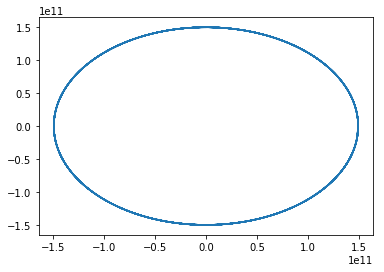

In [10]:
import matplotlib.pyplot as plt

plt.plot([x[0] for x in pos_list], [x[1] for x in pos_list])
plt.show()